<a href="https://colab.research.google.com/github/nfilipas/handson-ml3/blob/main/exercises/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 10

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np

In [2]:
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
X, y = olivetti.data, olivetti.target
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=40, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=40, stratify=y_train_val)

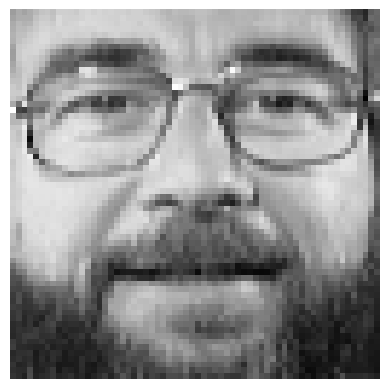

In [4]:
plt.imshow(X_train[0].reshape((64,64)), cmap="gray")
plt.axis("off")
plt.show()

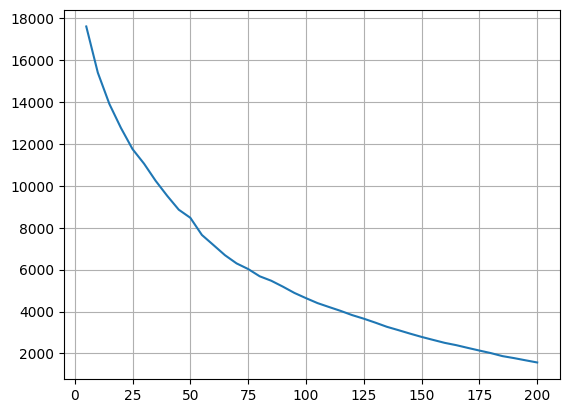

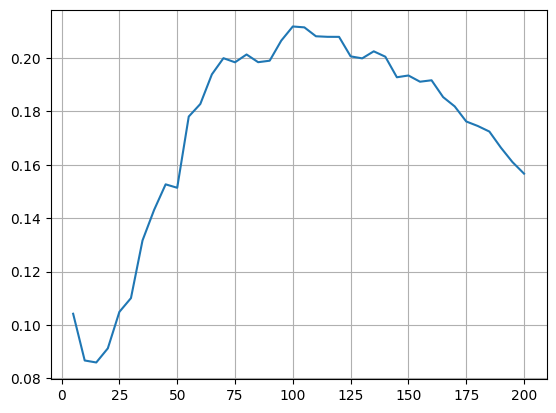

In [5]:
n_clusters_max = 200
n_clusters_range = range(5, n_clusters_max + 1, 5)
inertia_list = []
silhouette_list = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X_train, kmeans.labels_))

plt.plot(n_clusters_range, inertia_list)
plt.grid(True)
plt.show()

plt.plot(n_clusters_range, silhouette_list)
plt.grid(True)
plt.show()

In [6]:
n_clusters_best_index = np.argmax(silhouette_list)
print(f"Number of clusters with best silhouette score: {list(n_clusters_range)[n_clusters_best_index]}")

Number of clusters with best silhouette score: 100


In [7]:
kmeans = KMeans(n_clusters=130, n_init="auto", random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=130, n_init='auto', random_state=42)

Cluster 1:


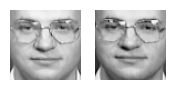


Cluster 2:


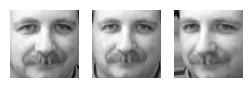


Cluster 3:


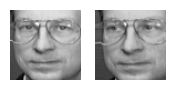


Cluster 4:


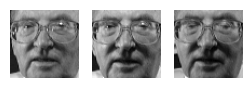


Cluster 5:


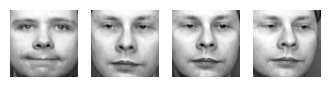


Cluster 6:


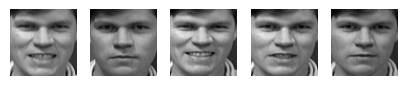


Cluster 7:


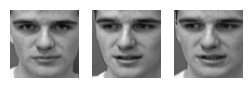


Cluster 8:


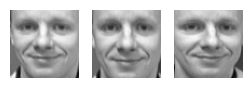


Cluster 9:


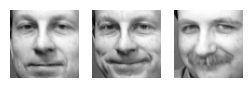


Cluster 10:


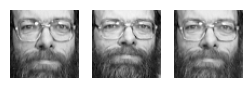

In [8]:
n_labels_max = 10
for n_labels in range(n_labels_max):
    print(f"Cluster {n_labels + 1}:")
    X_train_cluster_i = X_train[kmeans.labels_ == n_labels]
    n_images = X_train_cluster_i.shape[0]
    fig, axes = plt.subplots(1, n_images, figsize=(n_images, 1))
    axes = np.atleast_1d(axes)
    for i in range(X_train_cluster_i.shape[0]):
        axes[i].imshow(X_train_cluster_i[i].reshape((64, 64)), cmap="gray")
        axes[i].axis("off")
    plt.show()
    print()

# Exercise 11

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, FeatureUnion, FunctionTransformer
from sklearn.model_selection import GridSearchCV
from copy import deepcopy

In [10]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
rf_clf.score(X_val, y_val)

0.9

In [12]:
n_clusters_list = list(range(5, 201, 5))
best_acc = 0

for n_clusters in n_clusters_list:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init="auto", random_state=42),
        RandomForestClassifier(random_state=42))

    pipeline.fit(X_train, y_train)
    val_acc = pipeline.score(X_val, y_val)
    print(f"Number of clusters: {n_clusters}, accuracy: {val_acc}")
    if val_acc > best_acc:
        best_acc = val_acc
        best_pipeline = deepcopy(pipeline)

Number of clusters: 5, accuracy: 0.475
Number of clusters: 10, accuracy: 0.575
Number of clusters: 15, accuracy: 0.55
Number of clusters: 20, accuracy: 0.725
Number of clusters: 25, accuracy: 0.775
Number of clusters: 30, accuracy: 0.75
Number of clusters: 35, accuracy: 0.75
Number of clusters: 40, accuracy: 0.775
Number of clusters: 45, accuracy: 0.775
Number of clusters: 50, accuracy: 0.75
Number of clusters: 55, accuracy: 0.8
Number of clusters: 60, accuracy: 0.8
Number of clusters: 65, accuracy: 0.8
Number of clusters: 70, accuracy: 0.825
Number of clusters: 75, accuracy: 0.775
Number of clusters: 80, accuracy: 0.825
Number of clusters: 85, accuracy: 0.8
Number of clusters: 90, accuracy: 0.775
Number of clusters: 95, accuracy: 0.8
Number of clusters: 100, accuracy: 0.775
Number of clusters: 105, accuracy: 0.75
Number of clusters: 110, accuracy: 0.75
Number of clusters: 115, accuracy: 0.775
Number of clusters: 120, accuracy: 0.8
Number of clusters: 125, accuracy: 0.775
Number of clu

In [13]:
print(f"Optimal number of clusters: {best_pipeline['kmeans'].n_clusters}")
print(f"Accuracy on validation set: {best_pipeline.score(X_val, y_val)}")

Optimal number of clusters: 175
Accuracy on validation set: 0.875


In [14]:
best_acc = 0
for n_clusters in n_clusters_list:

    feature_concat = FeatureUnion([
        ("original", FunctionTransformer(lambda x: x)),
        ("kmeans", KMeans(n_clusters=n_clusters, n_init="auto", random_state=42))
    ])

    pipeline = make_pipeline(feature_concat,
                            RandomForestClassifier(random_state=42))

    pipeline.fit(X_train, y_train)

    val_acc = pipeline.score(X_val, y_val)
    print(f"Number of clusters: {n_clusters}, validation accuracy: {val_acc}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_pipeline = deepcopy(pipeline)

Number of clusters: 5, validation accuracy: 0.925
Number of clusters: 10, validation accuracy: 0.9
Number of clusters: 15, validation accuracy: 0.925
Number of clusters: 20, validation accuracy: 0.925
Number of clusters: 25, validation accuracy: 0.925
Number of clusters: 30, validation accuracy: 0.9
Number of clusters: 35, validation accuracy: 0.925
Number of clusters: 40, validation accuracy: 0.9
Number of clusters: 45, validation accuracy: 0.925
Number of clusters: 50, validation accuracy: 0.925
Number of clusters: 55, validation accuracy: 0.925
Number of clusters: 60, validation accuracy: 0.9
Number of clusters: 65, validation accuracy: 0.925
Number of clusters: 70, validation accuracy: 0.925
Number of clusters: 75, validation accuracy: 0.9
Number of clusters: 80, validation accuracy: 0.925
Number of clusters: 85, validation accuracy: 0.925
Number of clusters: 90, validation accuracy: 0.925
Number of clusters: 95, validation accuracy: 0.925
Number of clusters: 100, validation accura

In [15]:
print(f"Optimal number of clusters: {best_pipeline[0].get_params()['kmeans__n_clusters']}")
print(f"Accuracy on validation set: {best_pipeline.score(X_val, y_val)}")

Optimal number of clusters: 155
Accuracy on validation set: 0.95


# Exercise 12

In [117]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from statistics import median

import cv2
import random

In [23]:
pca = PCA(n_components=0.99, svd_solver="full")
X_train_red = pca.fit_transform(X_train)

In [41]:
bic_list = []
aic_list = []
n_clusters_range = range(2, n_clusters_max + 1)

for n_clusters in n_clusters_range:
    gm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=42)
    gm.fit(X_train_red)
    bic = gm.bic(X_train_red)
    bic_list.append(bic)
    aic = gm.aic(X_train_red)
    aic_list.append(aic)
    print(f"Number of clusters: {n_clusters}, BIC: {round(bic)}, AIC: {round(aic)}")

Number of clusters: 2, BIC: 116178, AIC: -68700
Number of clusters: 3, BIC: 34570, AIC: -242749
Number of clusters: 4, BIC: 65323, AIC: -304436
Number of clusters: 5, BIC: 148130, AIC: -314070
Number of clusters: 6, BIC: 242302, AIC: -312338
Number of clusters: 7, BIC: 357564, AIC: -289517
Number of clusters: 8, BIC: 474805, AIC: -264717
Number of clusters: 9, BIC: 605916, AIC: -226047
Number of clusters: 10, BIC: 726979, AIC: -197424


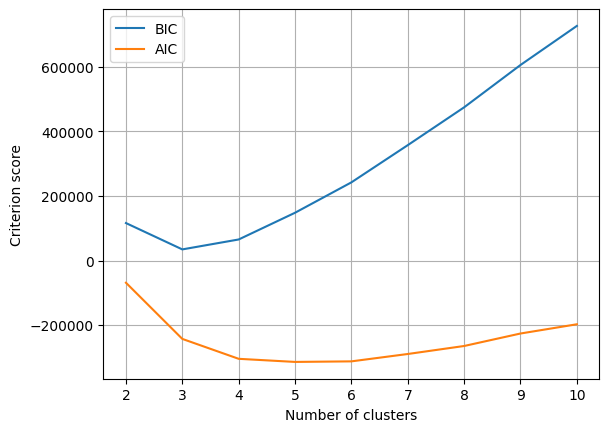

In [42]:
plt.plot(n_clusters_range, bic_list, label="BIC")
plt.plot(n_clusters_range, aic_list, label="AIC")
plt.xlabel("Number of clusters")
plt.ylabel("Criterion score")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
gm = GaussianMixture(n_components=4, n_init=10, random_state=42)
gm.fit(X_train_red)

GaussianMixture(n_components=4, n_init=10, random_state=42)

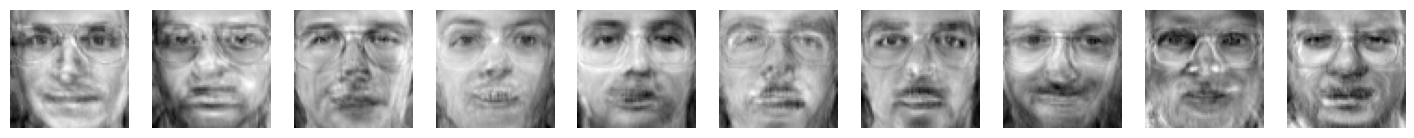

In [52]:
n_samples = 10
X_new, y_new = gm.sample(n_samples)
X_new_original = pca.inverse_transform(X_new)

fig, axes = plt.subplots(1, n_samples, figsize=(18, 2))
for i in range(n_samples):
    axes[i].imshow(X_new_original[i].reshape((64, 64)), cmap="gray")
    axes[i].axis("off")
plt.show()

In [88]:
def rotate_image(image, degrees):
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, degrees, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))
    return rotated_image

def flip_image(image, flip_string):
    if flip_string == "vertically":
        flip_code = 0
    else:
        flip_code = 1
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

def darken_image(image, factor):
    darkened_image = image * factor
    return darkened_image

In [112]:
n_images = 320
X_mod = np.empty((n_images, 64, 64))
for n_image in range(n_images):
    if (n_image + 1)/n_images < 1/3:
        degrees = random.randint(-180, 180)
        X_mod[n_image] = rotate_image(X_train[i].reshape((64, 64)), degrees)
    elif (n_images + 1)/n_images < 2/3:
        flip_string = random.choice(["horizontally", "vertically"])
        X_mod[n_image] = flip_image(X_train[i].reshape((64, 64)), flip_string)
    else:
        factor = random.uniform(0, 1)
        X_mod[n_image] = darken_image(X_train[i].reshape(64, 64), factor)

In [120]:
X_densities = gm.score_samples(pca.transform(X_train[:30]))
X_mod_densities = gm.score_samples(pca.transform(X_mod.reshape(n_images, -1)))
print(f"Original dataset, average density = {round(X_densities.mean())}, median density = {round(median(X_densities))}")
print(f"Modified dataset, average density = {round(X_mod_densities.mean())}, median density = {round(median(X_mod_densities))}")

Original dataset, average density = 757, median density = 693
Modified dataset, average density = -12791037, median density = -14000680


# Exercise 13

In [146]:
rec_error = np.square(X_train - pca.inverse_transform(X_train_red)).mean()
print(f"Original dataset, reconstruction error: {rec_error}")

X_mod_pca = pca.transform(X_mod.reshape(320, -1))
rec_error_mod = np.square(X_mod.reshape(320, -1) - pca.inverse_transform(X_mod_pca)).mean()
print(f"Modified dataset, reconstruction error: {rec_error_mod}")

Original dataset, reconstruction error: 0.00018927481141872704
Modified dataset, reconstruction error: 0.003998200797701818
